# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [ ]:
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0




## Implementing UCB

In [ ]:
d = dataset.shape[1] # number of Ads (columns)
N = dataset.shape[0] # number of users (rows)
numbers_of_selections = [1] * d
sums_of_rewards = [0] * d
total_reward = 0
ads_selected = []

for n in range(N): # iterate through the columns - Users
    ad = 0
    max_upper_bound = 0
    for i in range(d): # iterate through the rows - Ads
        # the algo is looking for the highest upper bound
        # this value increses proportionally with the rewards so the upper bound would increase as well
        # if the algo selected an Ad multiple times and it didn't get enough rewards then the upper bound is gonna decrease
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = np.sqrt(3/2 * np.log(n+1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i # index of the Ad
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.iloc[n, ad] #reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

In [ ]:
N = dataset.shape[0]  # Number of users
d = dataset.shape[1]  # Number of ads

# Initialize variables
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

# UCB algorithm
for n in range(N): # iterate through the columns - Users
    ad = 0
    max_upper_bound = 0
    for i in range(d): # iterate through the rows - Ads
        # the algo is looking for the highest upper bound
        # this value increses proportionally with the rewards so the upper bound would increase as well
        # if the algo selected an Ad multiple times and it didn't get enough rewards then the upper bound is gonna decrease

        if numbers_of_selections[i] > 0: # skipping calculations for ads that haven’t been selected yet
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # Prioritize unselected ads

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward


In [ ]:
total_reward

2178

In [ ]:
n = 100  # Number of items per row
for i in range(0, len(ads_selected), n):
    print(*ads_selected[i:i+n]) # * unpacking operator

0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 0 1 2 3 4 5 6 7 8 8 9 0 8 1 2 3 4 5 6 6 7 7 7 9 7 0 6 8 1 2 3 4 4 4 4 4 5 9 7 0 0 6 8 4 0 7 1 1 2 3 5 9 4 1 6 8 0 7 2 3 5 9 4 1 6 8 0 7 7 7 7 7 7 4 2 3 5 9 1
6 8 0 0 7 0 4 1 6 8 2 3 5 9 7 0 4 4 4 7 7 7 7 1 6 8 2 3 5 9 0 7 7 4 7 7 7 1 6 8 0 4 4 2 3 5 9 4 7 0 7 1 1 1 6 6 6 6 6 8 4 2 3 5 9 7 7 7 0 6 4 1 1 1 8 7 2 3 5 9 4 0 1 1 1 6 7 8 4 1 2 3 5 9 0 6 7 8 4 7
1 0 6 2 3 5 9 7 7 7 7 4 4 4 4 4 7 8 1 0 6 6 6 7 4 2 3 5 9 1 6 8 7 0 4 4 4 4 4 2 3 5 9 1 6 7 4 8 0 7 4 4 4 1 6 2 3 5 9 0 0 0 7 8 4 0 0 0 1 6 7 4 2 3 5 9 0 8 7 1 6 4 0 7 7 7 7 7 2 3 5 9 8 4 1 6 6 6 7 7
7 0 6 7 4 1 1 1 2 2 2 3 5 9 2 8 7 0 1 6 4 7 2 8 3 5 9 9 9 9 4 0 1 6 7 4 7 0 1 6 2 8 9 3 5 4 7 0 0 0 1 6 2 8 9 4 0 3 5 7 1 6 7 4 0 2 8 9 3 5 7 4 4 4 4 4 1 6 4 0 7 2 8 9 4 3 5 1 6 6 6 0 6 7 4 4 4 2 8 8
8 8 9 4 1 7 0 6 3 5 7 7 7 4 8 1 2 9 7 0 0 0 0 0 0 0 0 0 6 3 5 4 4 4 7 4 4 4 0 1 1 1 8 8 8 8 1 6 4 2 9 7 3 3 3 3 5 0 4 4 4 8 1 6 4 7 2 3 9 0 5 4 7 1 6 8 0 2 3 9 4 7 7 7 7 1 6 8 5 0 4 7 2 3 9 1 6 4 0 8


In [ ]:
from collections import Counter
Counter(ads_selected)

Counter({0: 705,
         1: 387,
         2: 186,
         3: 345,
         4: 6323,
         5: 150,
         6: 292,
         7: 1170,
         8: 256,
         9: 186})

## Visualising the results

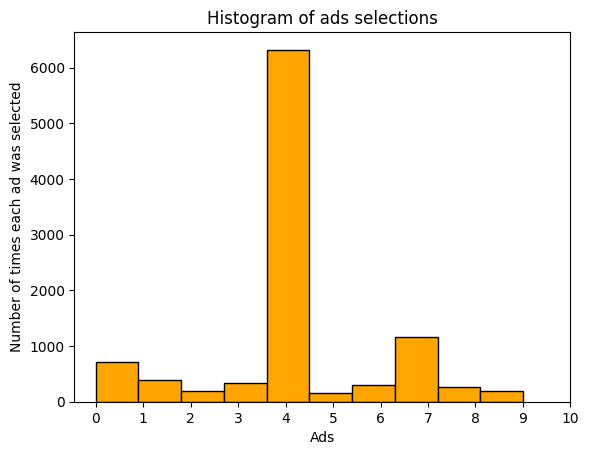

In [ ]:
plt.hist(ads_selected, edgecolor='black', linewidth=1, color = 'orange')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.xticks(range(0, 11))
plt.ylabel('Number of times each ad was selected')
plt.show()